In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lg
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [2]:
len_m = 8000
x = linspace(0, len_m, len_m)  # возвращает равномерно распределённые числа в данном интервале

mu, sigma = 0, 1
a0 = 1
a1 = 0.8
a2 = 0.5
w0 = 0.181
w1 = 0.176
w2 = 0.02
k = 0.0000005

#data_1 = 0.1*(np.random.random(len_m))
#np.exp(-k*x**2)*

# T= 2*pi
f1 = ((a0 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00) + (a1 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00) + (a2 + 0.2*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in 0.25*(np.random.normal(mu, sigma, len_m))]
f2 = ((a0 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + (a1 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + (a2 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.025)) + [x for x in 0.3*(np.random.normal(mu, sigma, len_m))]
f3 = ((a0 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + (a1 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + (a2 + 0.18*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.0085)) + [x for x in 0.2*(np.random.normal(mu, sigma, len_m))]
f4 = ((a0 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + (a1 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + (a2 + 0.22*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.01275)) + [x for x in 0.1*(np.random.normal(mu, sigma, len_m))]

Mas = np.c_[f1, f2, f3, f4]


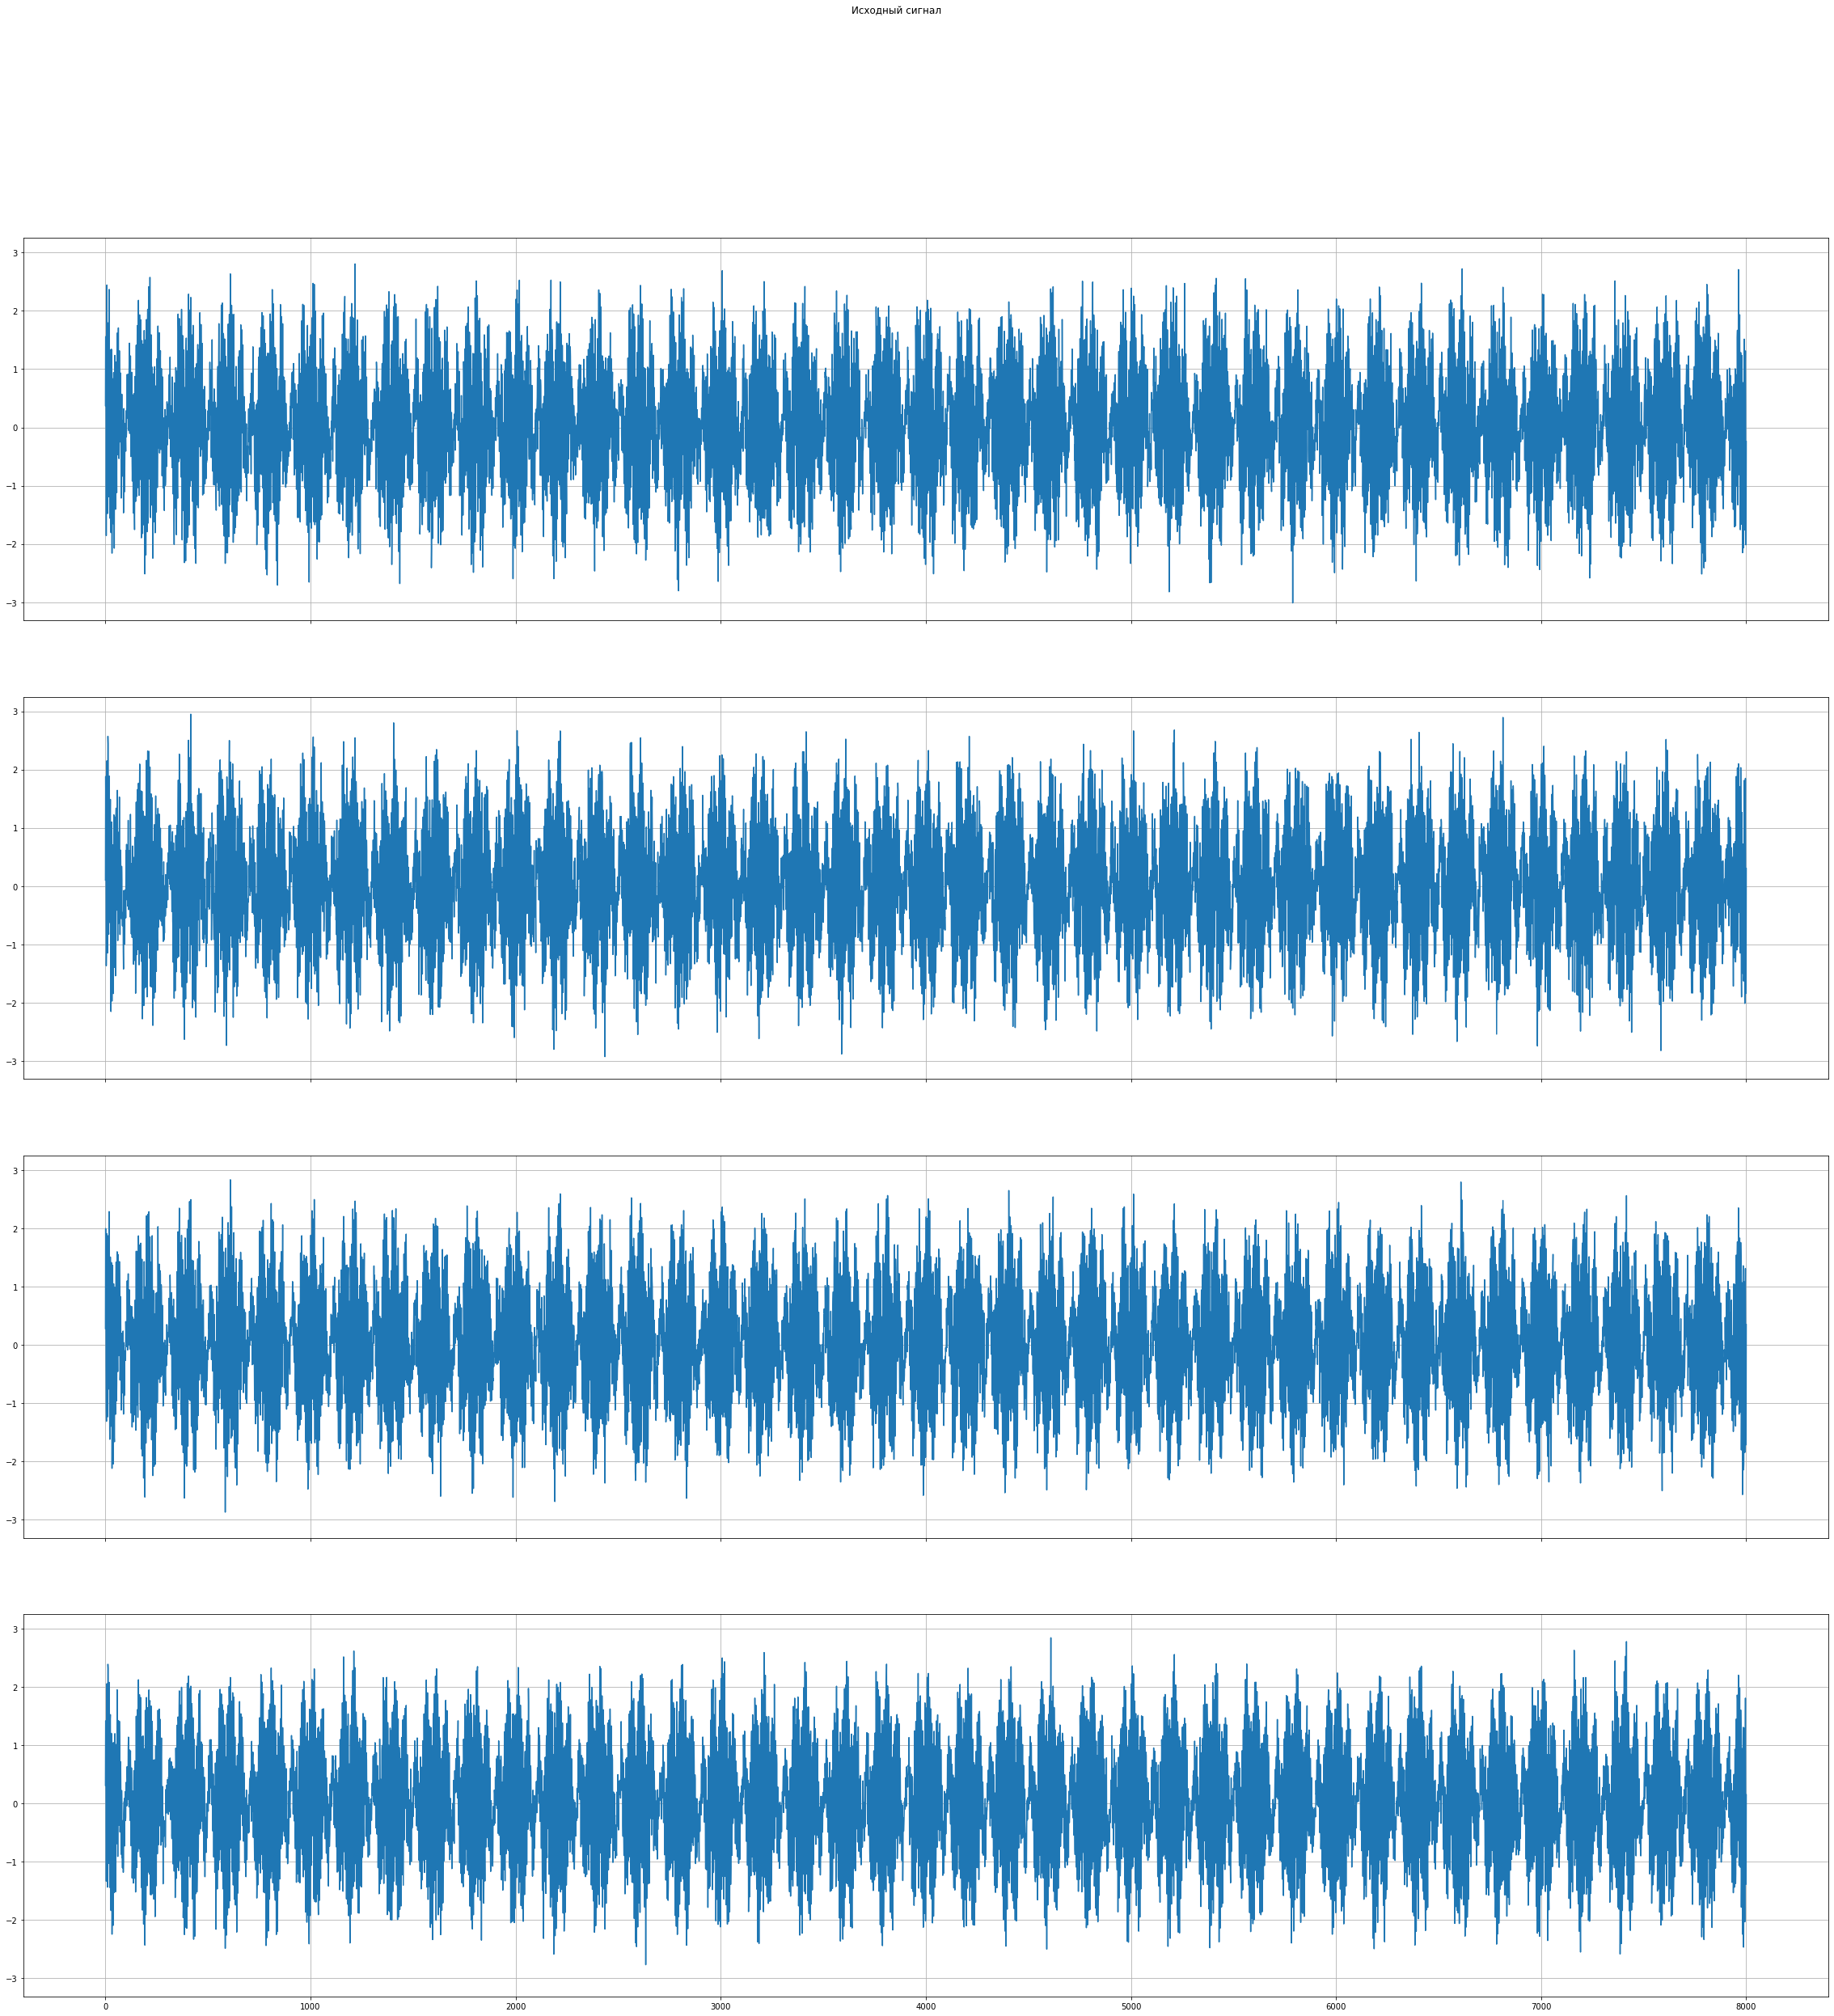

In [3]:
nrows, ncols = 4, 1
figsize = [40, 40]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()


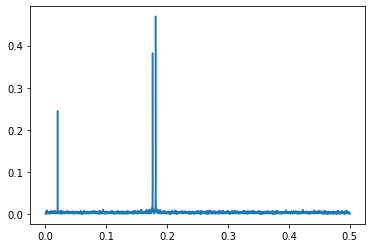

In [4]:
spectrs = rfft(f1 - np.mean(f1)) / (len(x))
nu = rfftfreq(len_m, 1.)
plt.plot(nu, np.abs(spectrs))

In [5]:
Mas2 = np.delete(Mas, (0), axis=0)
print(Mas2.shape)
zeros = np.array([0, 0, 0, 0])
Mas2 = np.vstack((Mas2, zeros))
print(Mas2.shape)
Mas = np.concatenate((Mas, Mas2), axis=1)

Mas2 = np.delete(Mas, (0, 1), axis=0) 
zeros_2 = np.zeros((2, 8))
Mas2 = np.vstack((Mas2, zeros_2))
print(Mas2.shape)
Mas = np.concatenate((Mas, Mas2), axis=1)
print(Mas[0])
print(Mas.shape)

(7999, 4)
(8000, 4)
(8000, 8)
[ 0.37434908  0.10357769  0.27865887  0.31094256  1.55797829  1.88191473
  1.99540484  1.41996496  1.54693443  1.27086274  1.41350788  1.40175866
 -0.20610407 -0.31583749 -0.33863121 -0.4793164 ]
(8000, 16)


In [6]:
U, sng, Mas_SVD = lg.svd(Mas.T, full_matrices=False)
print(Mas_SVD.shape)
print(U.shape)
print(sng.shape)
#spectrf = rfft(Mas_SVD - np.mean(Mas_SVD)) / (len(x))
nu = rfftfreq(len_m, 1.)


(16, 8000)
(16, 16)
(16,)


(8000,)
0.181
0.181
0.02
0.02
0.49
0.2235
0.26887500000000003
0.441
0.004
0.15675
0.3175
0.42075
0.020875
0.2785
0.2785
0.48512500000000003


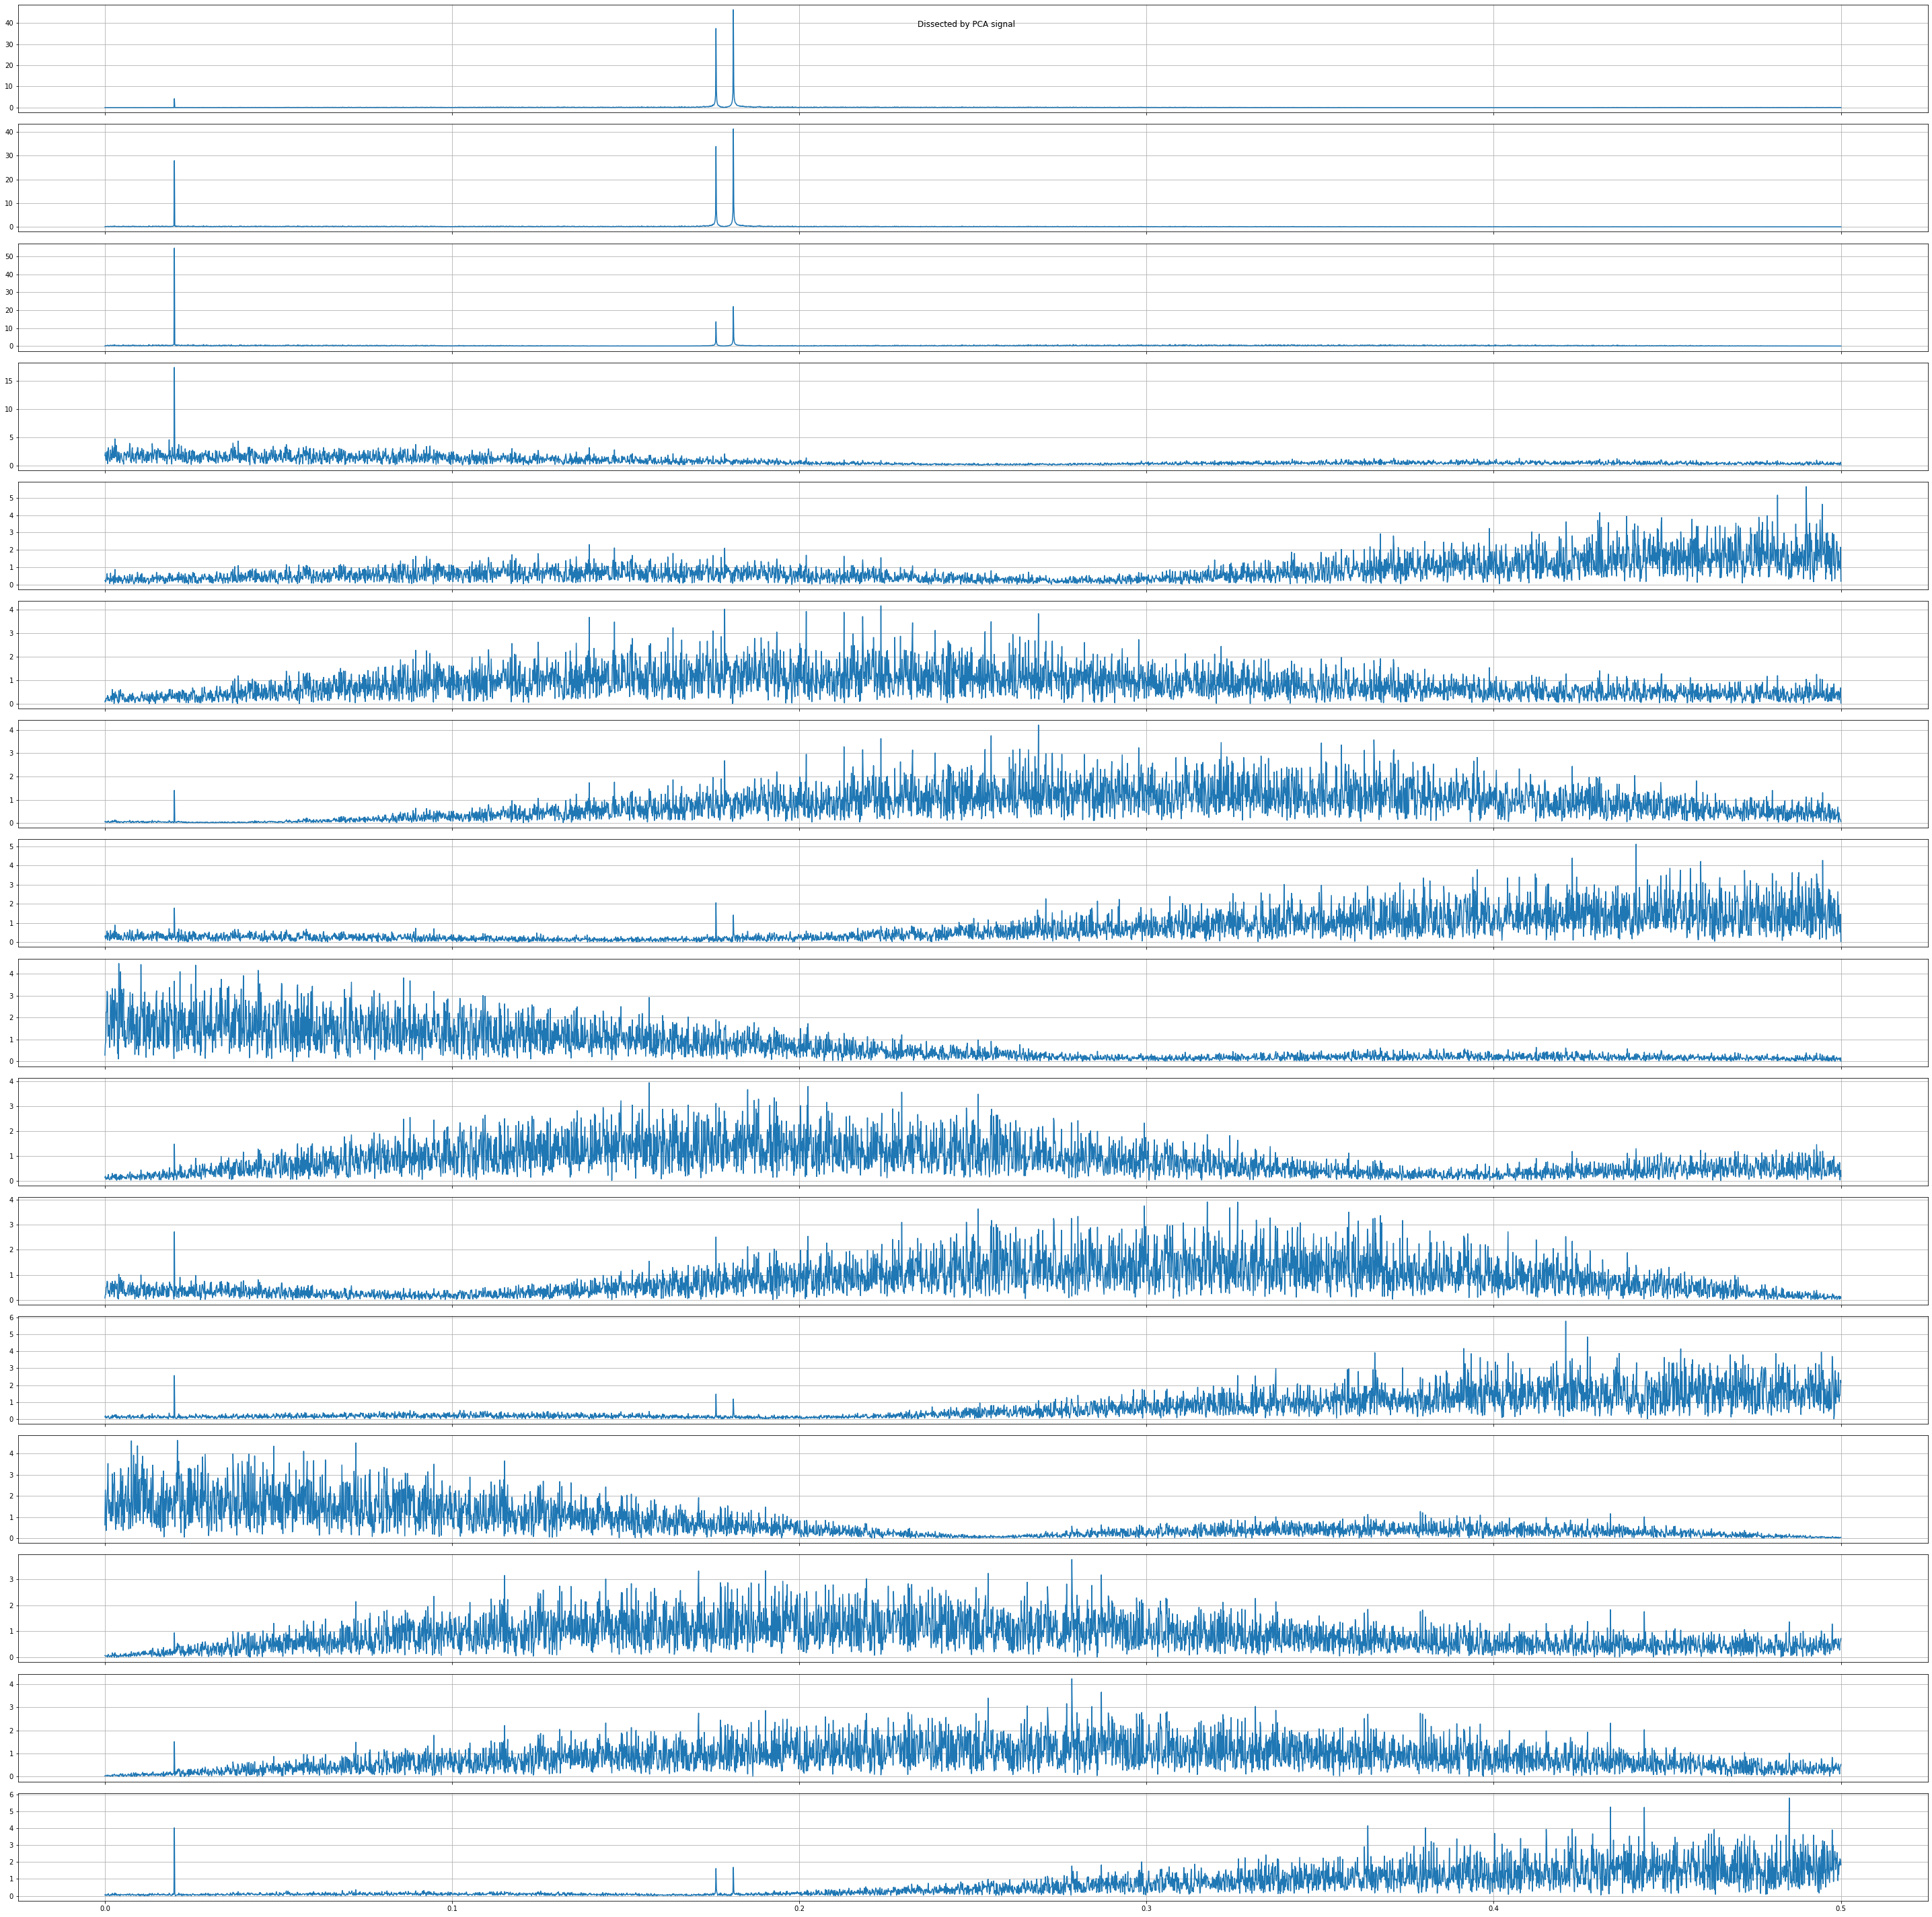

In [10]:
fig, ax = plt.subplots(nrows=16, ncols=ncols, figsize=[40, 40], sharex=True)
fig.suptitle('Dissected by PCA signal')
print(Mas_SVD[1, :].shape)
for i in range(Mas_SVD.shape[0]):
    #print(Mas_SVD.shape[1])
    #spectrf = rfft(Mas_SVD[i, :] - np.mean(Mas_SVD[i, :]))
    spectrf = rfft(Mas_SVD[i, :])
    ax[i].plot(nu, np.abs(spectrf))
    print(nu[np.argmax(np.abs(spectrf), axis=0)])
    
    #ax[i].plot(x,np.abs(S_[:, i]))
    ax[i].grid(True)


#axes = plt.gca()
#axes.set_xlim([0.175, 0.185])
plt.tight_layout()
plt.show()